In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve, cross_validate
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("BreastCancerData.csv")
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
y = data['diagnosis']
x = data.drop(['id', 'diagnosis','Unnamed: 32'], axis='columns')

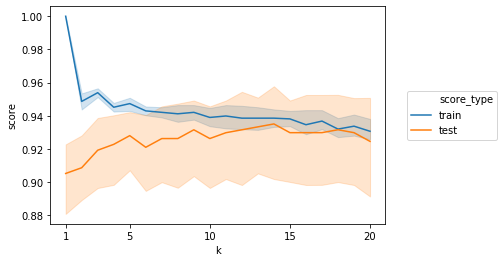

In [9]:
scores = pd.DataFrame()
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    cv_results = cross_validate(clf, x, y, return_train_score = True)
    score1 = pd.DataFrame({'k': [i]*5, 'score': cv_results['train_score'], 'score_type': 'train'})
    score2 = pd.DataFrame({'k': [i]*5, 'score': cv_results['test_score'], 'score_type': 'test'})
    scores = scores.append([score1,score2], ignore_index=True)
g = sns.lineplot(data=scores, x='k', y='score', hue='score_type')
g.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
g.set_xticks(ticks=[1,5,10, 15, 20])
plt.show()

In [17]:
##########
#KNN with k=9
##########
final_score = scores.loc[scores['k']==9].loc[scores['score_type']=='test']
final_score = final_score['score'].to_numpy()
print("Accuracy of kNN: %0.4f +/- %0.4f" % (final_score.mean(), final_score.std()))

Accuracy of kNN: 0.9315 +/- 0.0279


In [20]:
#learning curve of a 9-NN learner
clf = KNeighborsClassifier(n_neighbors=9)
lc = learning_curve(clf, x, y, train_sizes = np.linspace(0.1, 1.0, 10), return_times=True)
train_sizes, train_scores, test_scores, fit_times, score_times = lc

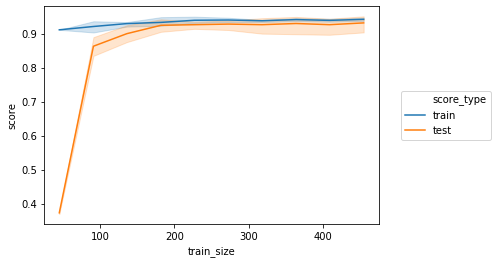

In [23]:
c1 = train_sizes.tolist()*5
c2 = train_scores.flatten('F')
c3 = test_scores.flatten('F')
df1 = pd.DataFrame({'train_size':c1, 'score':c2, 'score_type':'train'})
df2 = pd.DataFrame({'train_size':c1, 'score':c3, 'score_type':'test'})
df = pd.concat([df1,df2])
g = sns.lineplot(data = df, x = 'train_size', y = 'score', hue = 'score_type')
g.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [26]:
clf = KNeighborsClassifier(n_neighbors=2)
lc = learning_curve(clf, x, y, train_sizes = np.linspace(0.1, 1.0, 10), return_times=True)
train_sizes, train_scores, test_scores, fit_times, score_times = lc

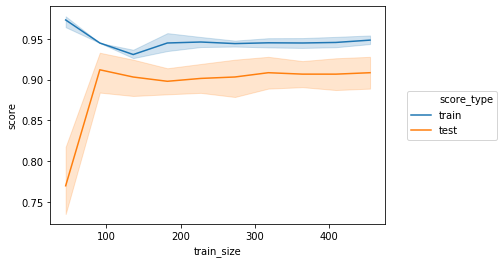

In [27]:
#learning curve of a 2-NN learner
c1 = train_sizes.tolist()*5
c2 = train_scores.flatten('F')
c3 = test_scores.flatten('F')
df1 = pd.DataFrame({'train_size':c1, 'score':c2, 'score_type':'train'})
df2 = pd.DataFrame({'train_size':c1, 'score':c3, 'score_type':'test'})
df = pd.concat([df1,df2])
g = sns.lineplot(data = df, x = 'train_size', y = 'score', hue = 'score_type')
g.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()